<a href="https://colab.research.google.com/github/Advitiya29/ProdigyInfoTech-internship/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv


🔍 Dataset Overview
(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   


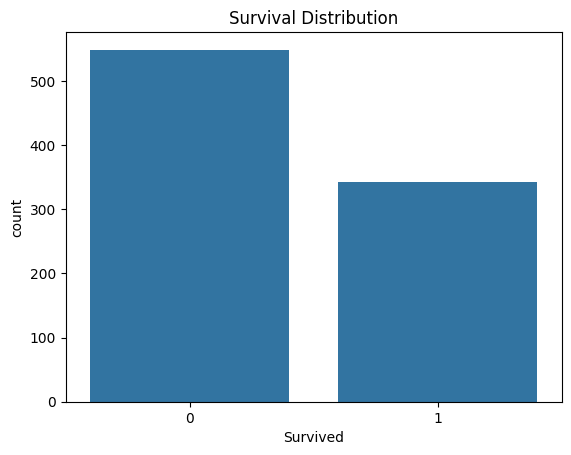

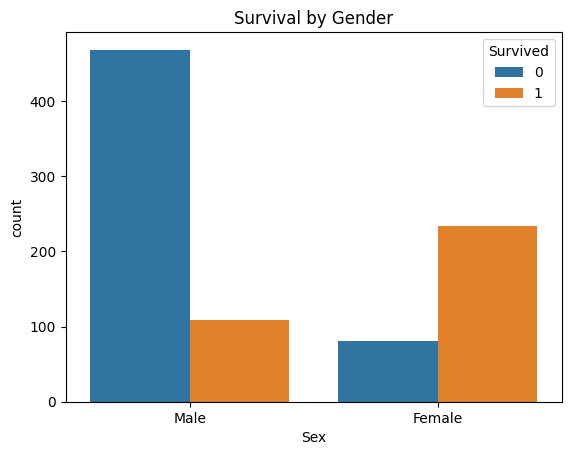

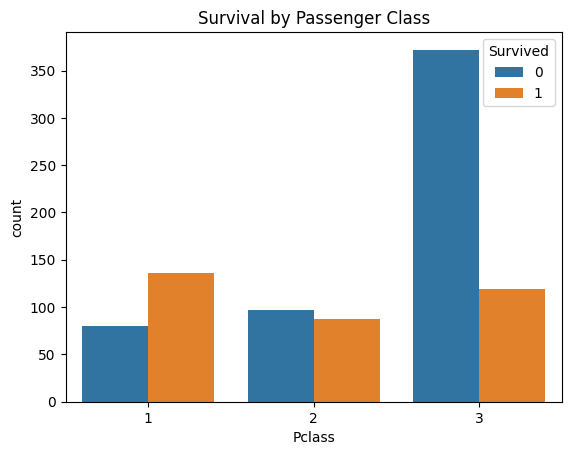

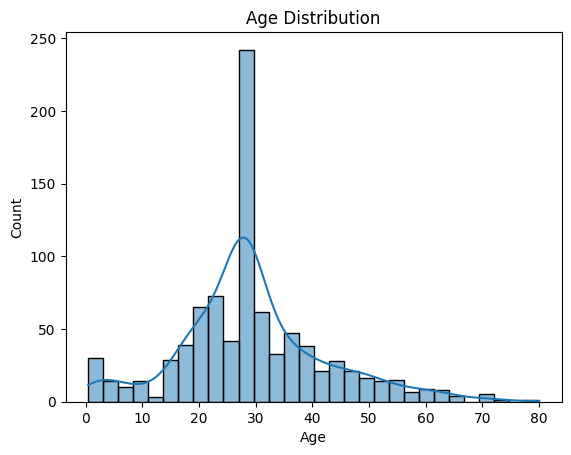

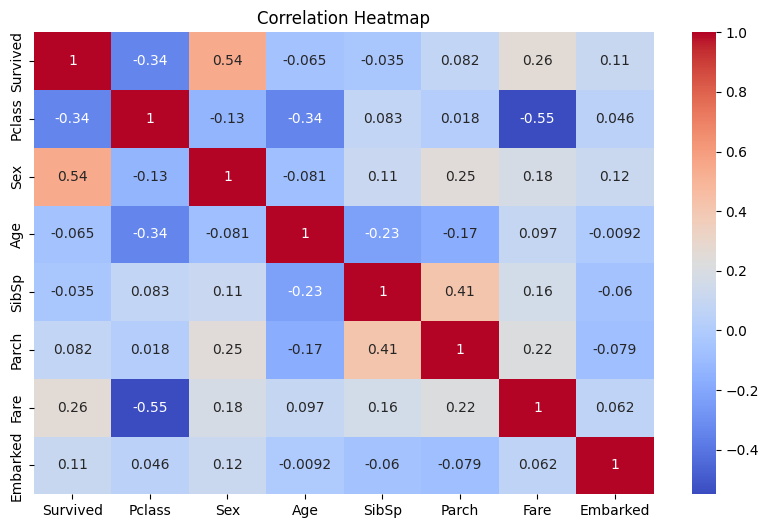

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the uploaded Titanic dataset
df = pd.read_csv("train.csv")

# Display basic info
print("🔍 Dataset Overview")
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

# Check for missing values
print("\n❗ Missing Values:")
print(df.isnull().sum())

# Handling missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)  # Too many missing values

# Feature Engineering
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

# 🧠 Exploratory Data Analysis (EDA)

# 1. Survival Count
sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution")
plt.show()

# 2. Gender vs Survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

# 3. Pclass vs Survival
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# 4. Age Distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()